Epoch 1/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.8688 - accuracy: 0.3222 - val_loss: 1.7272 - val_accuracy: 0.3784
Epoch 2/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.6784 - accuracy: 0.3963 - val_loss: 1.5875 - val_accuracy: 0.4241
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5901 - accuracy: 0.4312 - val_loss: 1.5315 - val_accuracy: 0.4598
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5397 - accuracy: 0.4448 - val_loss: 1.5238 - val_accuracy: 0.4594
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5015 - accuracy: 0.4618 - val_loss: 1.5147 - val_accuracy: 0.4598
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4615 - accuracy: 0.4747 - val_loss: 1.4941 - val_accuracy: 0.4720
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4343 - accuracy: 0.4840 - val_loss: 1.5107 -

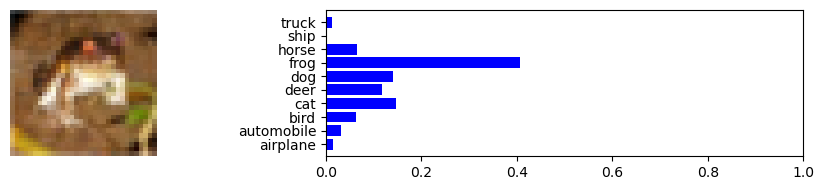

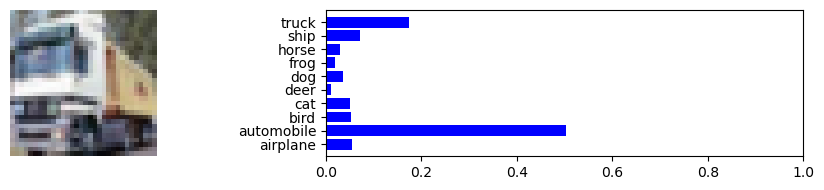

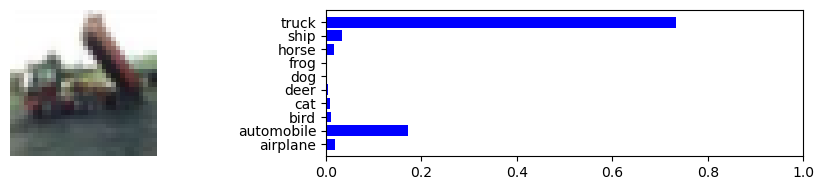

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define hyperparameters
hidden_units_list = [(512, 256, 128), (256, 128, 64), (1024, 512, 256)]
activation_list = ['relu', 'tanh', 'sigmoid']

# Create a dictionary to store results
results_dict = {}

# Loop through combinations of hidden units and activations
counter = 1
for hidden_units in hidden_units_list:
    for activation in activation_list:
        # Create and compile the model
        model = models.Sequential([
            layers.Flatten(input_shape=(32, 32, 3)),
            layers.Dense(hidden_units[0], activation=activation),
            layers.Dense(hidden_units[1], activation=activation),
            layers.Dense(hidden_units[2], activation=activation),
            layers.Dense(10, activation='softmax')
        ])
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # Train the model for 5 epochs
        model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

        # Evaluate the model on test data
        test_loss, test_acc = model.evaluate(x_test, y_test)

        # Store results in the dictionary
        results_dict[counter] = {
            "Hidden units": hidden_units,
            "Activation": activation,
            "Test accuracy": round(test_acc * 100, 4)
        }

        counter += 1

# Find and print the best-performing model
max_accuracy_run = max(results_dict, key=lambda k: results_dict[k]["Test accuracy"])
max_accuracy_info = results_dict[max_accuracy_run]
print("Run with the highest test accuracy:")
print(f"Run {max_accuracy_run}:")
for info_key, info_value in max_accuracy_info.items():
    print(f"{info_key}: {info_value}")

# Visualize predictions for a sample image
num_images = 3
sample_images = x_train[:num_images]
predictions = model.predict(sample_images)

class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

for i in range(num_images):
    plt.figure(figsize=(10, 2))
    plt.subplot(1, 2, 1)
    plt.imshow(sample_images[i])
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.barh(class_labels, predictions[i], color='blue')
    plt.xlim([0, 1])
    plt.tight_layout()
    plt.show()
